# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [3]:
# Libraries
import numpy as np
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import pylab as plt
import seaborn as sns


## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [4]:
# your code here
fitbit=pd.read_csv('../data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

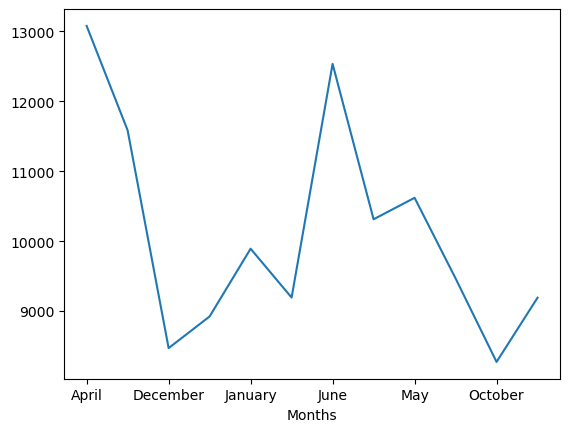

In [5]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
fitbit.groupby('Months')['Steps'].mean().plot()
plt.savefig('../figures/steps_month_plot.png');

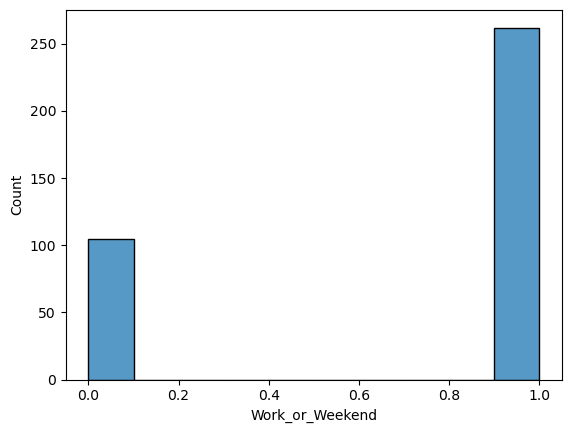

In [6]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
sns.histplot(x=fitbit.Work_or_Weekend)
plt.savefig('../figures/steps_wow.png');

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

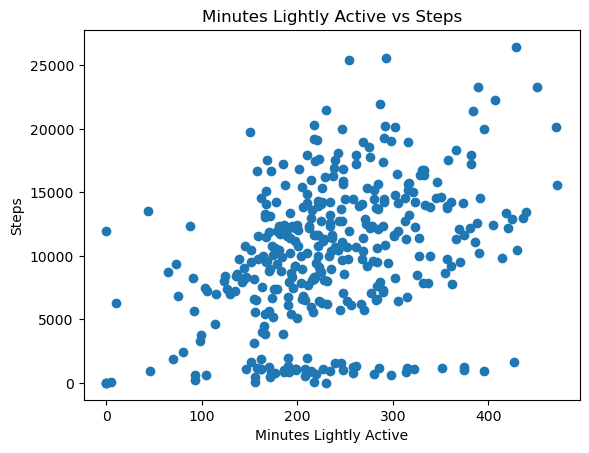

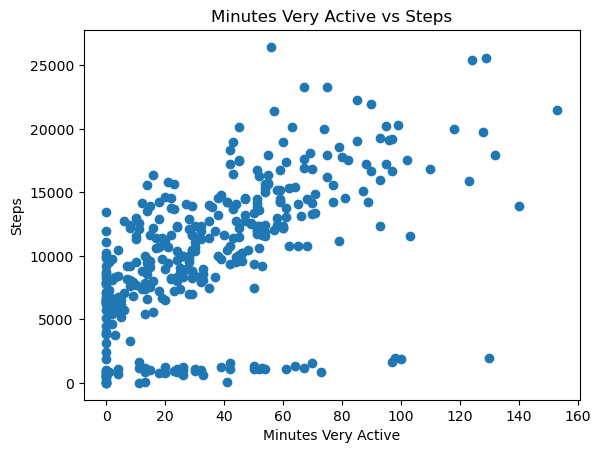

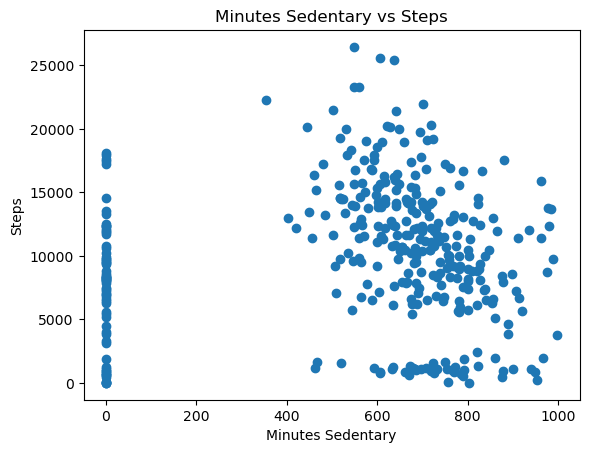

In [9]:
# your code here
selected=['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
for item in selected:
    plt.scatter(x=fitbit[item], y=fitbit['Steps'])
    plt.title(f'{item} vs Steps')
    plt.xlabel(item)
    plt.ylabel('Steps')
    plt.show()


## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
# your code here
titanic=pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [14]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [16]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=['int64', 'float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [17]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [19]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12, 6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

Text(0.5, 1.0, 'Age Distribution on the Titanic')

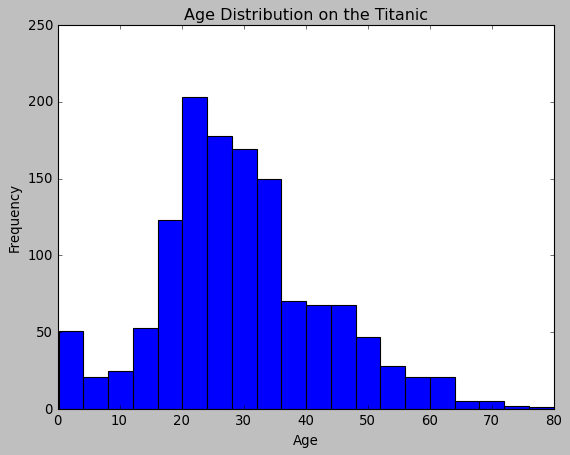

In [29]:
# your code here
plt.hist(titanic['Age'], bins=20)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution on the Titanic')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

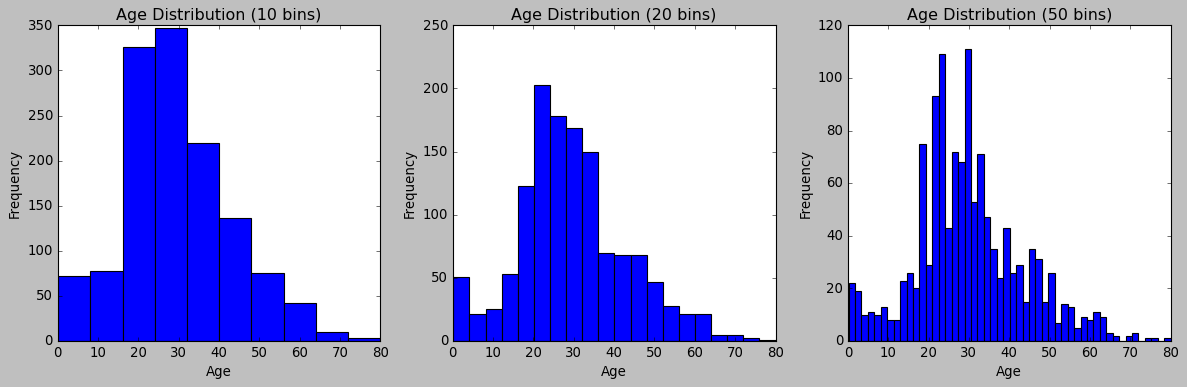

In [31]:
# your code here
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

bins_values = [10, 20, 50]
titles = ['Age Distribution (10 bins)', 'Age Distribution (20 bins)', 'Age Distribution (50 bins)']

for i, bins in enumerate(bins_values):
    axes[i].hist(titanic['Age'], bins=bins)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Frequency')

plt.tight_layout() 

#### How does the bin size affect your plot?

In [ ]:
"""
When the size of the bins is lower, ages get grouped together so data is missed
"""

#### Use seaborn to show the distribution of column `Age`.

Text(0.5, 1.0, 'Age Distribution on the Titanic')

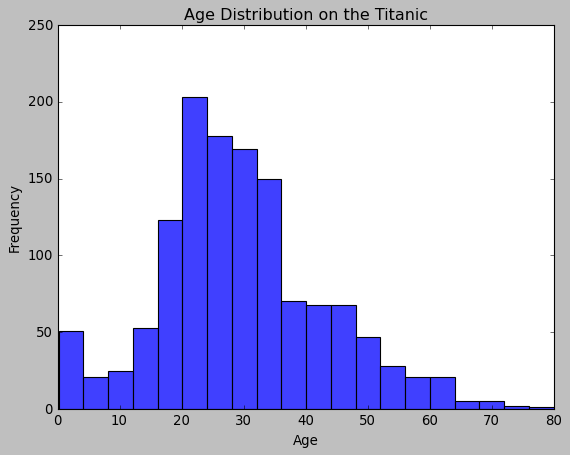

In [33]:
# your code here
sns.histplot(data=titanic, x='Age', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution on the Titanic')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<Axes: >

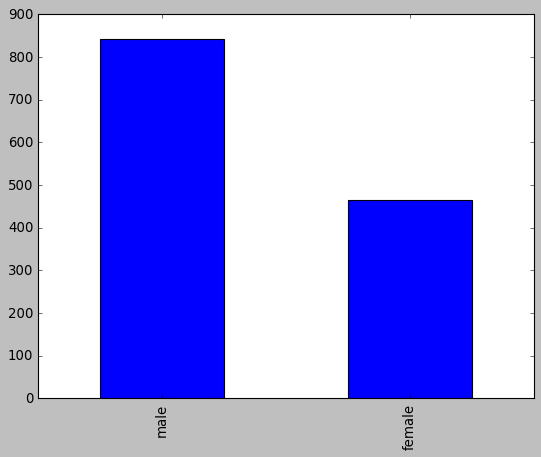

In [39]:
# Method 1 - matplotlib
# your code here
titanic['Gender'].value_counts().plot(kind='bar')


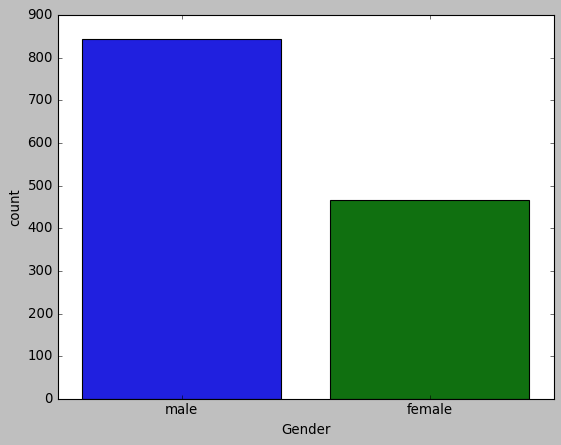

In [42]:
# Method 2 - seaborn
# your code here
sns.countplot(x=titanic['Gender']);


#### Use the right plot to visualize the column `Pclass`.

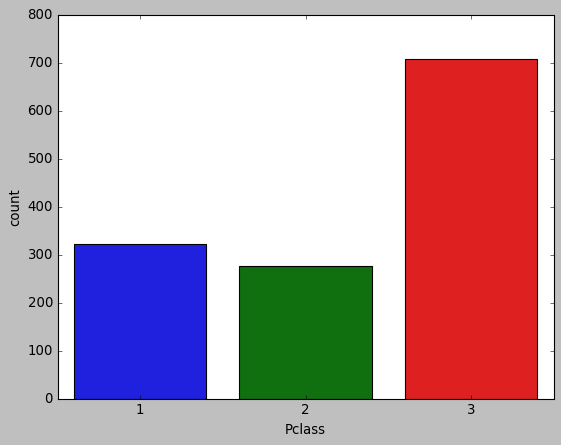

In [41]:
# your code here
sns.countplot(x=titanic['Pclass']);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

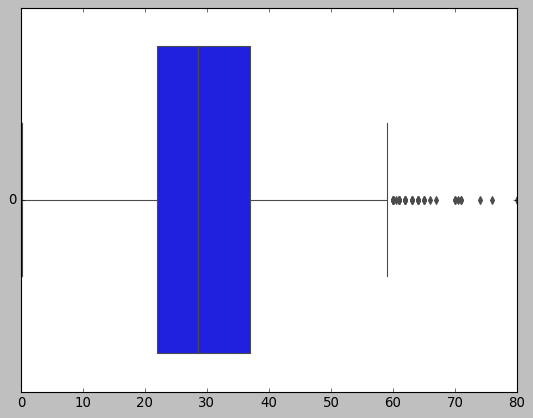

In [47]:
# your code here
sns.boxplot(data=titanic.Age, orient='h');

In [ ]:
"""
A boxplot includes the outliers, min, max and quartiles. 
"""

#### What does the last plot tell you about the feature `Age`?

It tells me that most people in the titanic were aged between 0 and 60 years old. There were a few aged between 60 and 80 but the majority were between 20 and 40 years old.

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

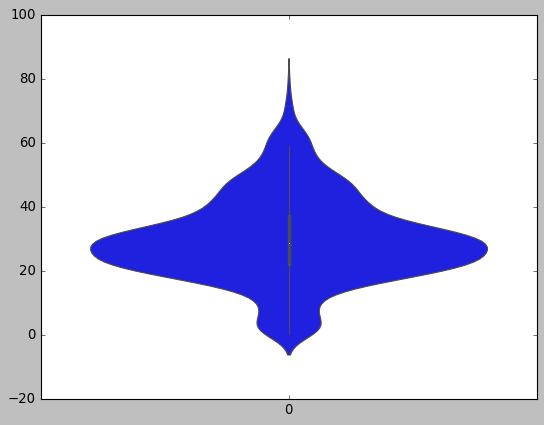

In [48]:
# your code here
sns.violinplot(data=titanic['Age']);

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
That most passengers were aged between 15 and 50 (with the majority between 20 and 40 as said before.)
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

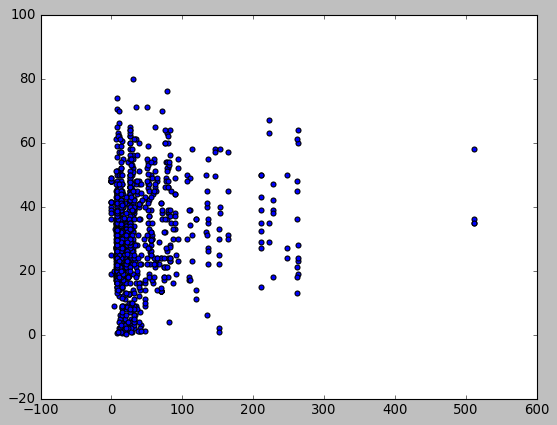

In [49]:
# Method 1 - matplotlib
# your code here
plt.scatter(x=titanic['Fare'], y=titanic['Age'])


<Axes: xlabel='Fare', ylabel='Age'>

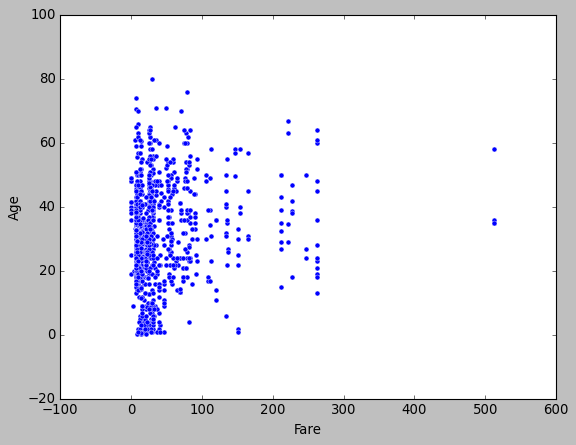

In [50]:
# Method 2 - seaborn
# your code here
sns.scatterplot(data=titanic, x='Fare', y='Age')


#### Plot the correlation matrix using seaborn.

In [51]:
# your code here
corr=titanic.corr(method='pearson')
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


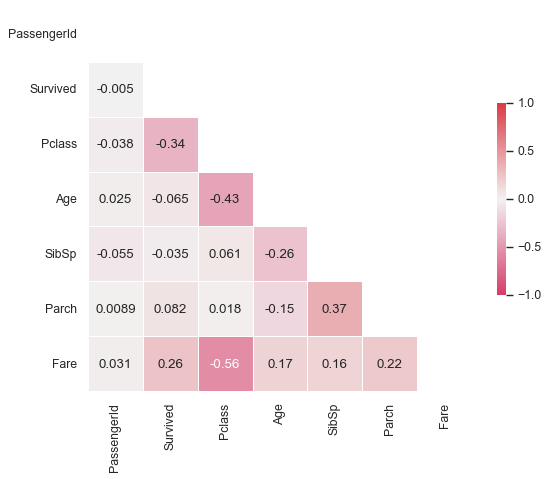

In [52]:
sns.set(style='white')       # estilo blanco

mascara = np.triu(np.ones_like(corr, dtype=bool))   # mascara

cmap = sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores



sns.heatmap(corr,             # datos
            mask=mascara,     # mascara
            cmap=cmap,        # mapa de color
            
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True                 # anotacion, el numero escrito
            
           );


#### What are the most correlated features?

In [ ]:
"""
Fare and Pclass with a -0.56 and Age and Pclass with -0.43. 
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<Axes: xlabel='Pclass', ylabel='Age'>

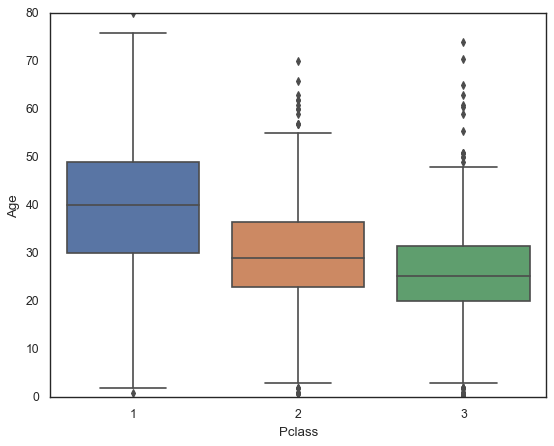

In [54]:
# your code here
sns.boxplot(data=titanic, x='Pclass', y='Age') 


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here